In [1]:
import numpy as np
import matplotlib.pyplot as plt

In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anac

In [6]:
import os
os.path.exists("./results")

True

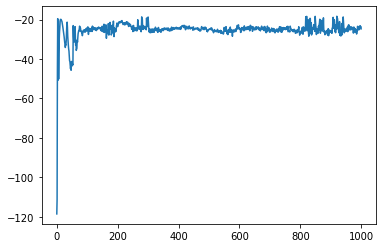

In [9]:
rewards = np.load("./results/TD3_LinearFitting_0.npy")
plt.plot(rewards)
plt.show()

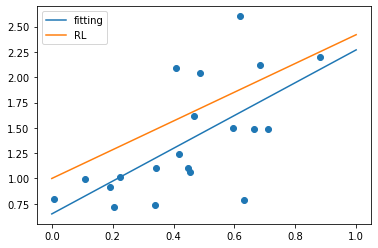

In [12]:
[x,y] = np.load("./results/TD3_LinearFitting_0_data.npy")

    #plot fitting curve
x_axis = np.linspace(0,1, num=50)
y_linear = [ j * 1.62+ 0.65 for j in x_axis ]

plt.figure(0)
plt.scatter(x,y)
plt.plot(x_axis,y_linear,label="fitting")
y_linear = [ j *1.42+1.00 for j in x_axis ]
plt.plot(x_axis,y_linear,label="RL")
plt.legend()
plt.show()



0.004914


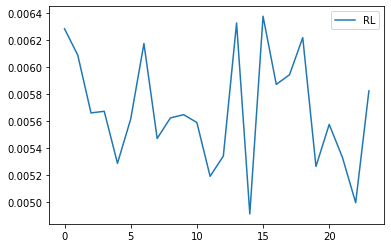

In [2]:
#Plot pre-trained RL
import matplotlib.pyplot as plt
import numpy as np 
a = np.load("./results/RL/DQN_PGMIndex_0.npy",allow_pickle=True)
runtime_list = []
for k in range(len(a)):
    runtime_list.append(-a[k][2])


print(min(runtime_list))

plt.figure(0)
plt.plot(runtime_list,label="RL")
plt.legend()
plt.show()

In [ ]:
#Plot one-shot RL

import numpy as np 
a = np.load("./results/RL/0_shot_DQN_PGMIndex_0_data_0.npy",allow_pickle=True)
runtime_list = []
for k in range(len(a)):
    runtime_list.append(a[k][2])

plt.figure(0)
plt.plot(runtime_list,label="RL")
plt.legend()
plt.show()


In [ ]:
#Plot one-shot RL

import numpy as np 
a = np.load("./results/RL/0_shot_DQN_PGMIndex_0_data_0.npy",allow_pickle=True)
runtime_list = []
for k in range(len(a)):
    runtime_list.append(a[k][2])

plt.figure(0)
plt.plot(runtime_list,label="RL")
plt.legend()
plt.show()


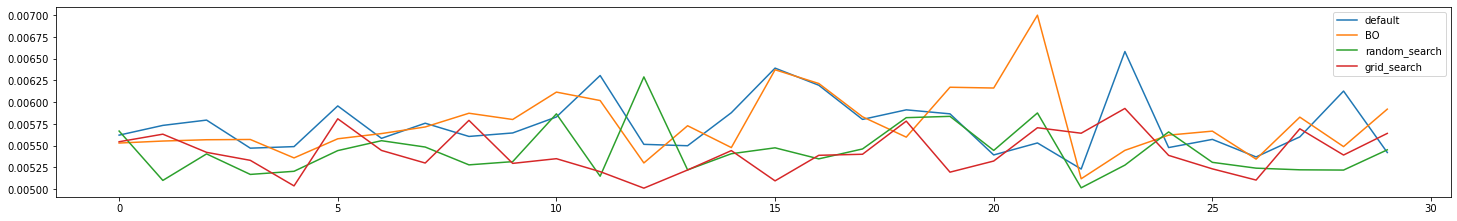

In [18]:
import numpy as np
import os

def readname(filePath):
    name = os.listdir(filePath)
    return name

names = readname('./results/default/')
arr_DF = []
for i in names:
    tempData =  np.load("./results/default/"+i)
    arr_DF.append(tempData)
    
names = readname('./results/BO/')
arr_BO = []
for i in names:
    tempData =  np.load("./results/BO/"+i)
    arr_BO.append(tempData)

names = readname('./results/random_search/')
arr_RS = []
for i in names:
    tempData =  np.load("./results/random_search/"+i)
    arr_RS.append(tempData)

names = readname('./results/grid_search/')
arr_GS = []
for i in names:
    tempData =  np.load("./results/grid_search/"+i)
    arr_GS.append(tempData)


plt.figure(figsize=(25, 3.5))
plt.plot(arr_DF,label="default")
plt.plot(arr_BO,label="BO")
plt.plot(arr_RS,label="random_search")
plt.plot(arr_GS,label="grid_search")
plt.legend()
plt.show()

    



In [19]:
def mean_improve(list1,list2):
    list_a = []
    for i in range(30):
        a = (list2[i]-list1[i])/list2[i]
        list_a.append(a)

    return(np.mean(list_a))

print(mean_improve(arr_BO,arr_DF))
print(mean_improve(arr_GS,arr_DF))
print(mean_improve(arr_RS,arr_DF))



-0.004864018129133087
0.052188630327716014
0.04916440110279598
